# Breast Cancer Prediction

## Stage 1

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score, StratifiedKFold


In [37]:
df = pd.read_csv('Cancer_data.csv')

### Data Analysis

#### Infos and Statistics

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [39]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [40]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [41]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


##### Cleaning and Mapping

Last column is null and useless, we are droping it. We don't need id either for prediction.

In [42]:
df = df.drop(columns=['Unnamed: 32', 'id'], axis=1)

In [43]:
print(df['diagnosis'].value_counts(normalize=True))

diagnosis
B    0.627417
M    0.372583
Name: proportion, dtype: float64


Mapping of the column we will predict : Malign (M) = 1, Begnign (B) = 0

In [44]:
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

In [45]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


##### Feature Distribution

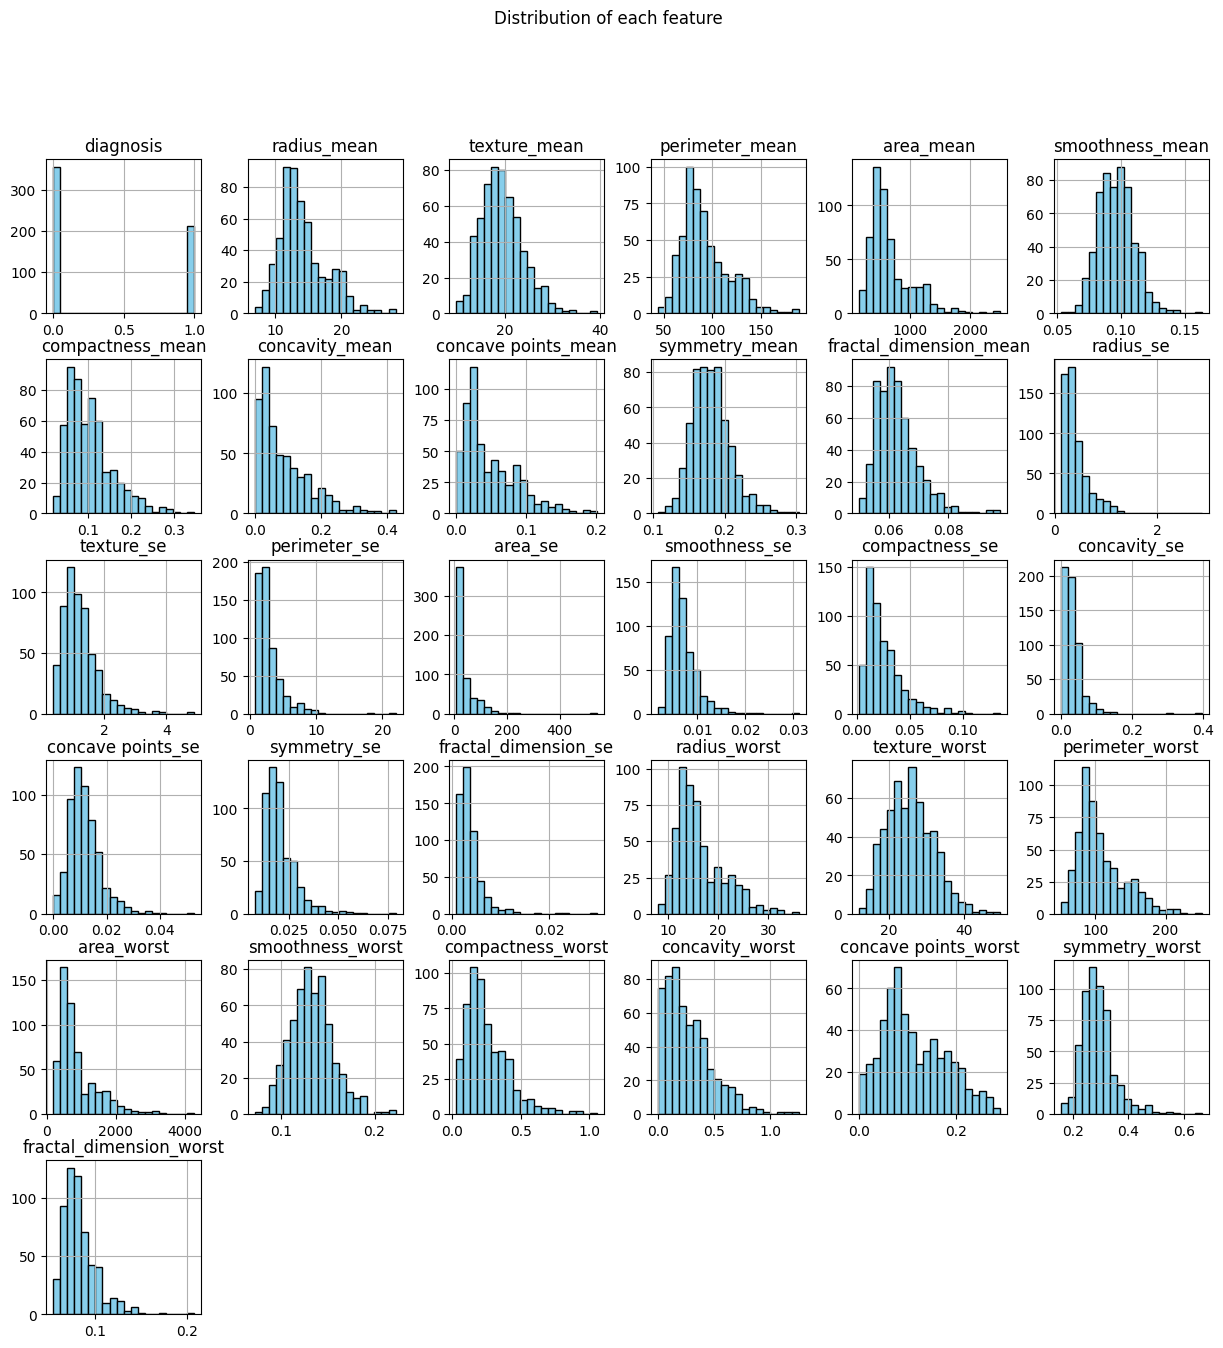

In [46]:
df.hist(bins=20, figsize=(15, 15), color='skyblue', edgecolor='black')
plt.suptitle('Distribution of each feature')
plt.show()

##### Outliers Detection

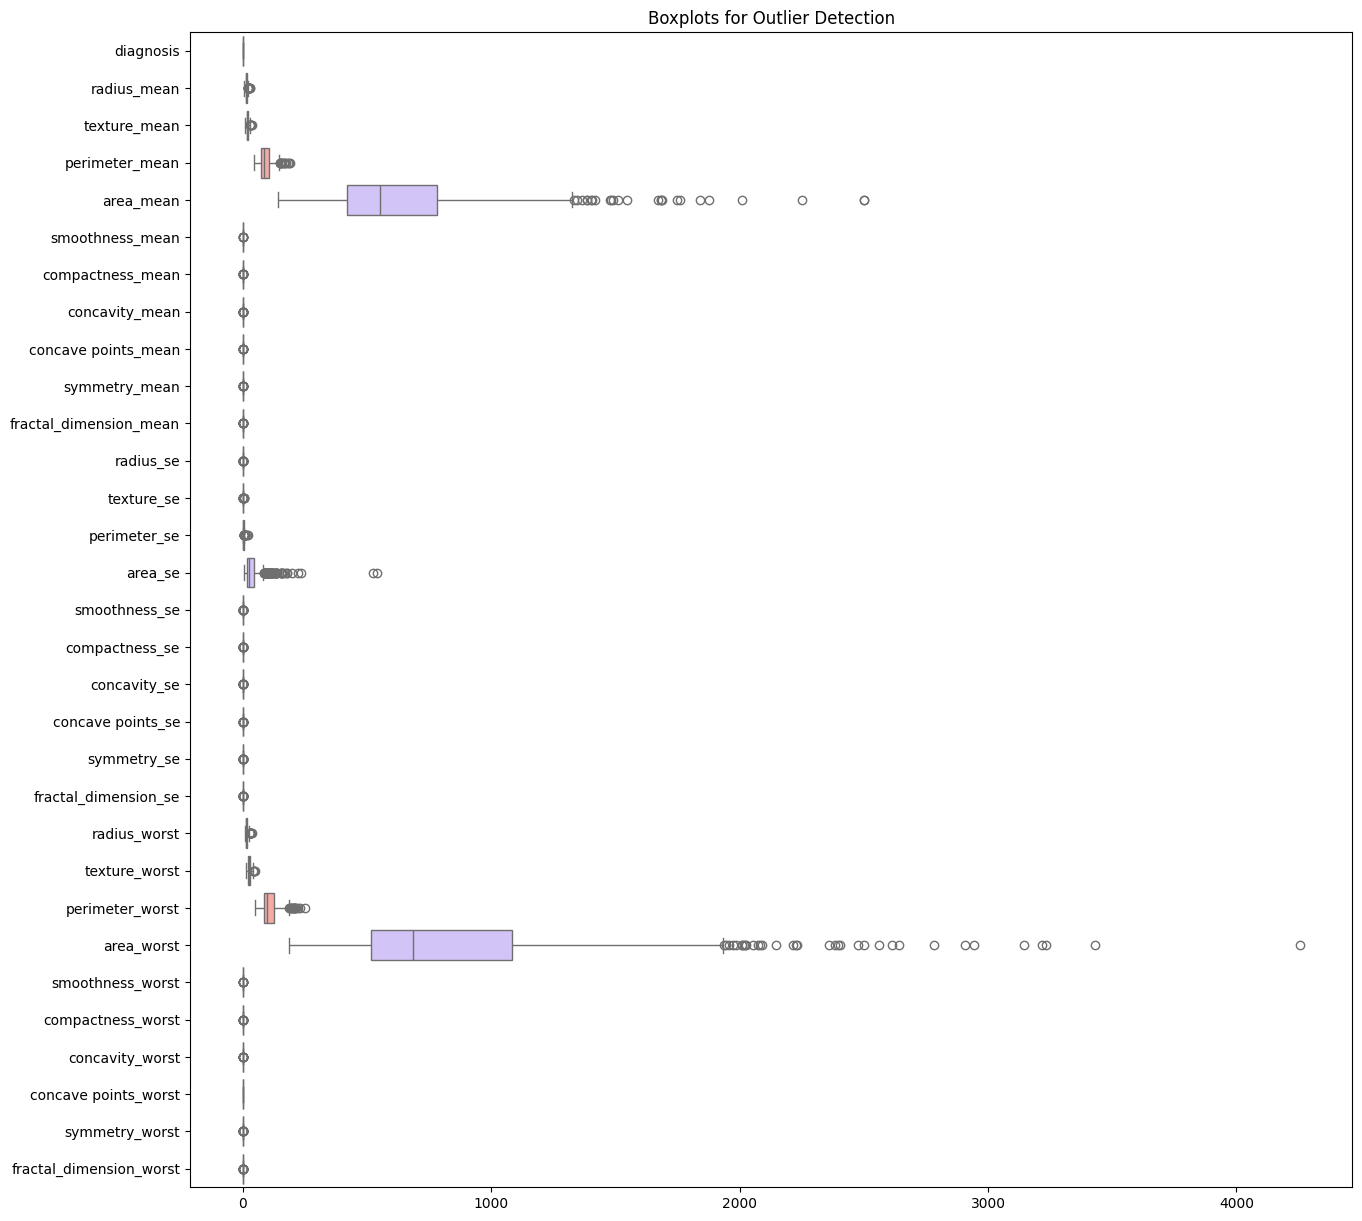

In [47]:
plt.figure(figsize=(15, 15))
sns.boxplot(data=df, orient="h", palette="pastel")
plt.title("Boxplots for Outlier Detection")
plt.show()

#### Correlation matrix

We will now do a correlation matrix to find the most relevent variables to predict benign or malign. Focusing on diagnosis, correlations near 1 mean that the higher the value of the parameter, the more likely it is associated with malign. On the contrary, if it is near -1 it means that the higher the value of the parameter, the more likely it is associated with benign. Near 0 means that the parameter and diagnosis are most likely independant from each other.

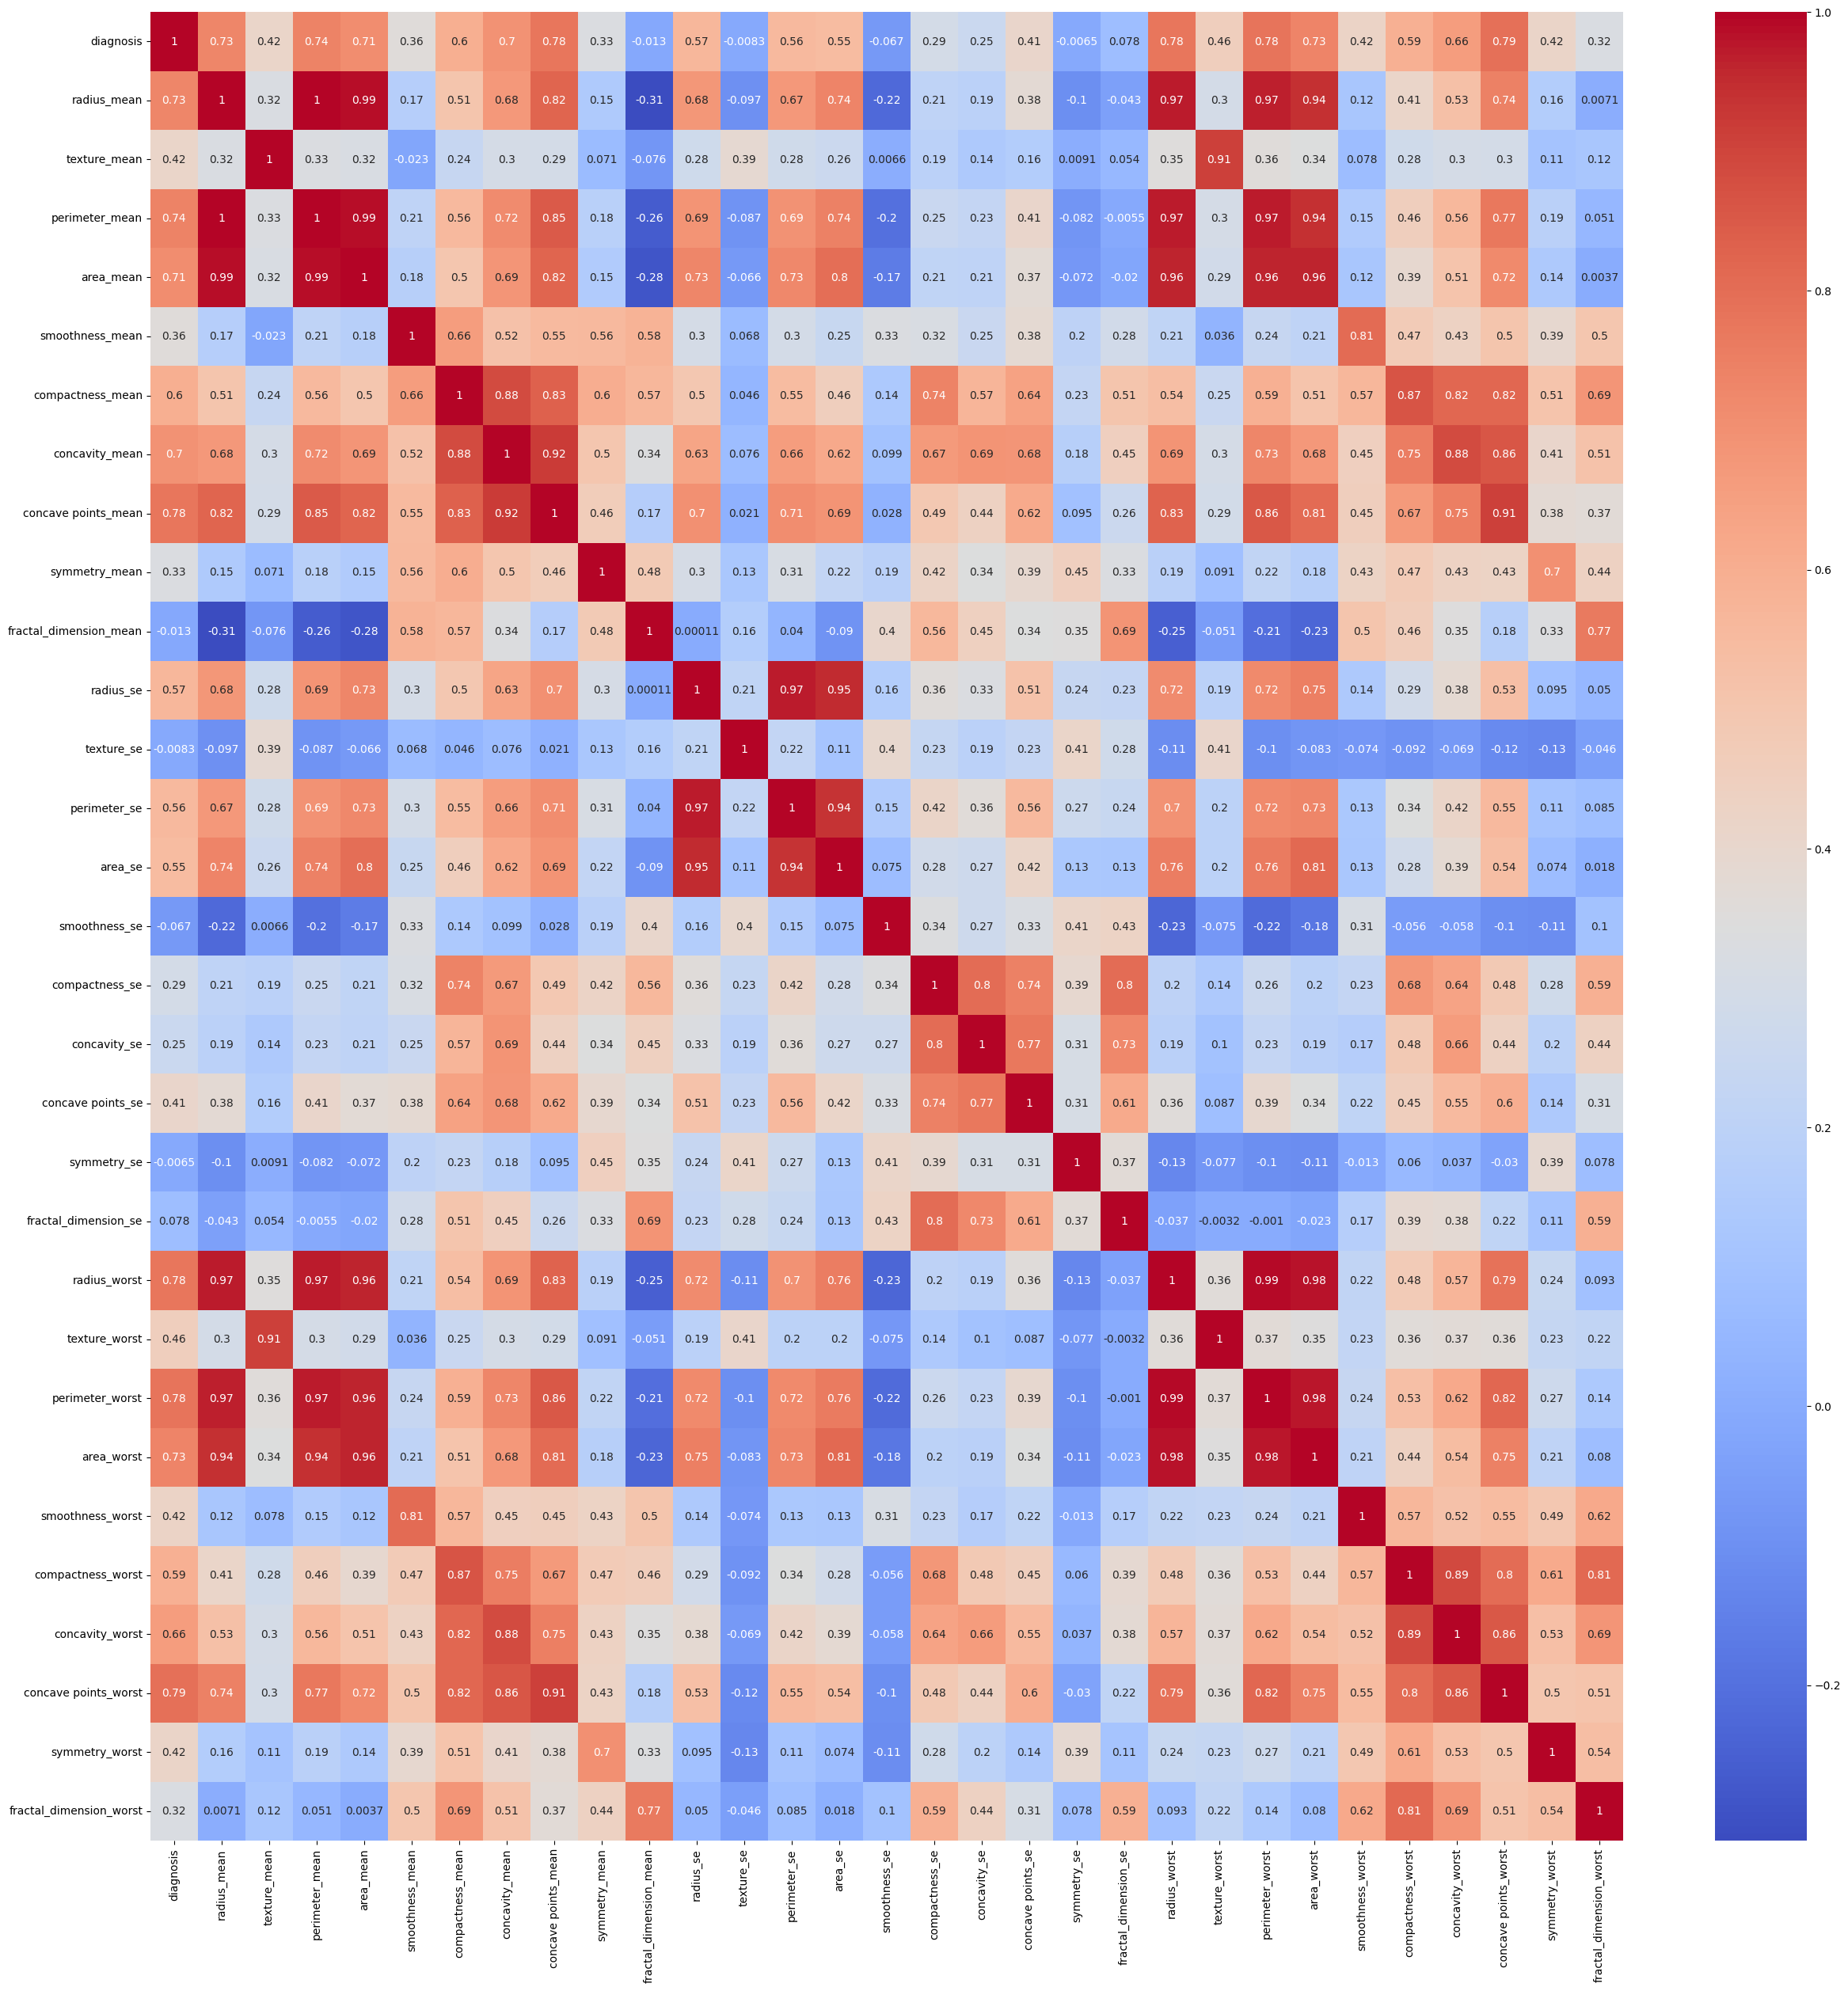

In [48]:
corr_matrix = df.corr()

plt.figure(figsize=(30,30))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

### Predictions

#### Preprocessing

##### Standardization and Split

In [49]:
# Standardize the feature data
features = df.drop('diagnosis', axis=1)
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Spliting features and target
X = features_scaled
y = df['diagnosis']

##### PCA

We want to find the number of component with explained variance at 95%

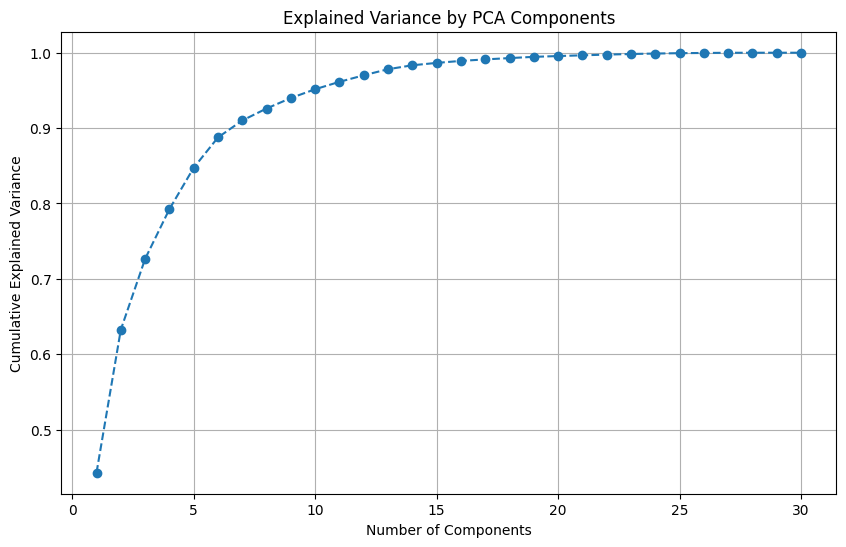

In [50]:
# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X)

# Plot the explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid()
plt.show()

In [51]:
# Applying PCA
pca_5 = PCA(n_components=5)  # Adjust components as needed
X_pca_5 = pca_5.fit_transform(X)

#### Model Predictions

In [52]:
# Create a function so we can use it with and without PCA later on
def models_pred(X_chosen):
    """
    Fonction for prediction with Logistic Regression, SVM, Random Forest and KNN.
    Print the complete raport of the prediction along with the cross-validation for each model
    """
    X_train, X_test, y_train, y_test = train_test_split(X_chosen, y, test_size=0.2, random_state=42)

    models = {
        "Logistic Regression": LogisticRegression(random_state=42),
        "Support Vector Machine (SVM)": SVC(probability=True, random_state=42),
        "Random Forest Classifier": RandomForestClassifier(random_state=42),
        "K-Nearest Neighbors (KNN)": KNeighborsClassifier(n_neighbors=5)
    }

    # For Cross-validation
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold cross-validation

    # Train and evaluate each model
    for model_name, model in models.items():
        print(f"\n===== {model_name} =====")
        
        model.fit(X_train, y_train)
        
        y_pred = model.predict(X_test)
        
        accuracy = accuracy_score(y_test, y_pred)
        confusion = confusion_matrix(y_test, y_pred)
        report = classification_report(y_test, y_pred)

        # Cross-validation
        scores = cross_val_score(model, X_chosen, y, cv=cv, scoring='accuracy')
        avg_accuracy = scores.mean()
        std_accuracy = scores.std()
        
        print("Accuracy:", accuracy)
        print("Confusion Matrix:\n", confusion)
        print("Classification Report:\n", report)
        print("Cross-Validation Accuracy: ", avg_accuracy, " ± ", std_accuracy)

##### Without PCA

In [53]:
X

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [54]:
models_pred(X)


===== Logistic Regression =====
Accuracy: 0.9736842105263158
Confusion Matrix:
 [[70  1]
 [ 2 41]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Cross-Validation Accuracy:  0.9736686849868033  ±  0.016627222216787987

===== Support Vector Machine (SVM) =====
Accuracy: 0.9736842105263158
Confusion Matrix:
 [[70  1]
 [ 2 41]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Cross-Validation 

##### With PCA (5 components)

In [55]:
X_pca_5

array([[ 9.19283683,  1.94858307, -1.12316616, -3.6337309 ,  1.19511012],
       [ 2.3878018 , -3.76817174, -0.52929269, -1.11826386, -0.62177498],
       [ 5.73389628, -1.0751738 , -0.55174759, -0.91208267,  0.1770859 ],
       ...,
       [ 1.25617928, -1.90229671,  0.56273053,  2.08922702, -1.80999133],
       [10.37479406,  1.67201011, -1.87702933,  2.35603113,  0.03374193],
       [-5.4752433 , -0.67063679,  1.49044308,  2.29915714,  0.18470331]])

In [56]:
models_pred(X_pca_5)


===== Logistic Regression =====
Accuracy: 0.9824561403508771
Confusion Matrix:
 [[70  1]
 [ 1 42]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.98      0.98      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Cross-Validation Accuracy:  0.9631423691973297  ±  0.015062926122136028

===== Support Vector Machine (SVM) =====
Accuracy: 0.9649122807017544
Confusion Matrix:
 [[69  2]
 [ 2 41]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        71
           1       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114

Cross-Validation 

#### Analysis and conclusion of Step 1

We can see that all model performed quite well. But there still are some differences.  
We can make a first choice of models and explore our next possibilities (without PCA):  
- KNN did a bit more of missclassification than the others
- RF slightly underperform for malign class with a precision of .98 while a recall at .93
- LR and SVM results are identical with the best F1-scores for both classes while having also minimal overfitting  


With PCA:  
- Logistic Regression: Slight improvement accuracy but reduced cross-validation consistency.
- SVM: Slight reduction of accuracy and metrics.
- Random Forest: Minimal impact with a slight decrease in performance.
- KNN: Performance remained unchanged but with slightly less stable cross-validation.


Logistic Regression seems to be the best model for now either with or without PCA.  
Overall, PCA provoked a decrease in all cross-validation while improving or keeping an accuracy quite high, which means it may have caused overfitting.  
It does not seem like a major proble here as the difference is quite small so we might keep the PCA next.


What we will try in Step 2:  
- Hyperparameters tuning for LR
- Boosting method with Gradient Boosting
- Stacking method with SVM and RF as base models and LR as meta model


## Stage 2

## Stage 3